In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

In [2]:
pf = pd.read_csv('profile_influencer.csv', encoding='utf-8')
sample = pd.read_csv('sample.csv', encoding='utf-8')
pf.sample(3)

,Unnamed: 0,alias,username,bio,num_of_posts,followers,following,bio_url,isprivate,scraped
84,84,티키틱 TIKITIK,tikitik.official,오늘이 무대🎵\r\r\r\n🎹신혁: @project_sh 🎭세진: @3jin5\r\...,75,16736,4,youtu.be/IVobCpMYqfM,False,2019-07-13 07:13:38
72,72,Lisa Rhee,imlisarhee,06.15.1995\r\r\r\n🔹@rheesarang\r\r\r\n🔻YouTube...,281,242461,332,youtu.be/YXqbDAGBXj0,False,2019-07-13 07:13:13
105,105,디에디트,the_edit.co.kr,사는 재미가 없다면 사는 재미라도\r\r\r\n[제휴문의: hello@the-edi...,699,23309,6296,the-edit.co.kr,False,2019-07-13 07:14:18


In [4]:
sample.head(3)

## lang_ratio is on comments

,Unnamed: 0,name,youtube,avg_hashtag,avg_comment,avg_self_comment,post_interval,ppl_img_ratio,comment_user_num,lang_ratio
0,0,0__0man,0__0man,0.0,40.2,0.0,1.111111,0.86,"{'comment1': 219, 'comment2': 31, 'comment3': ...","{'ko': '55.47', 'emoji': '44.53'}"
1,0,edmmer,EDMMER,0.6,24.0,3.2,1.428571,0.93,"{'comment1': 107, 'comment2': 24, 'comment3': ...","{'ko': '95.00', 'emoji': '5.00'}"
2,0,seonozzi,JungSeonho,0.3,35.1,0.0,0.172414,0.15,"{'comment1': 225, 'comment2': 34, 'comment3': ...","{'ko': '87.44', 'emoji': '12.56'}"


In [6]:
sample.keys()

Index(['Unnamed: 0', 'name', 'youtube', 'avg_hashtag', 'avg_comment',
       'avg_self_comment', 'post_interval', 'ppl_img_ratio',
       'comment_user_num', 'lang_ratio'],
      dtype='object')

In [7]:
sample.shape

(9, 10)

In [15]:
def compare(df, column):
    
    plt.figure(figsize=(12,6))
    plt.bar(df['name'], df[column], color='skyblue', edgecolor='navy')
    plt.title(str(column))
    plt.xticks(rotation=45)
    plt.show()

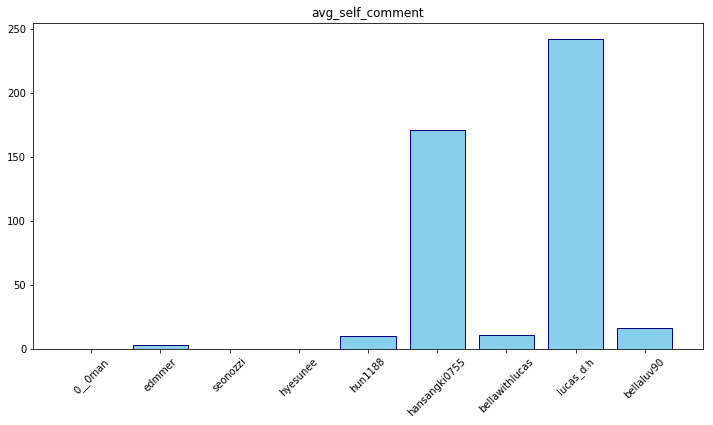

In [16]:
compare(sample, 'avg_self_comment')

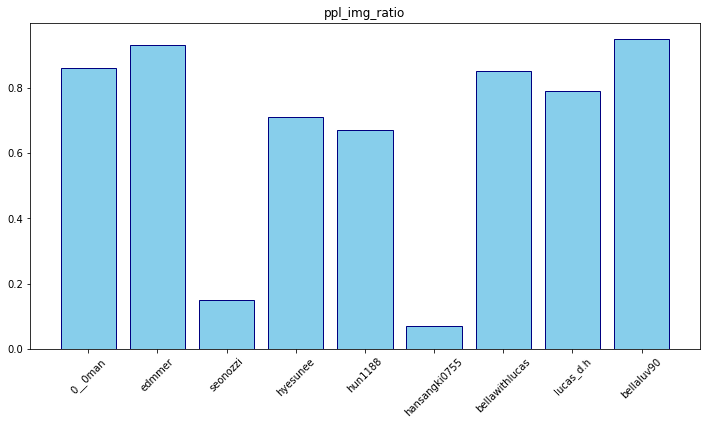

In [17]:
compare(sample, 'ppl_img_ratio')

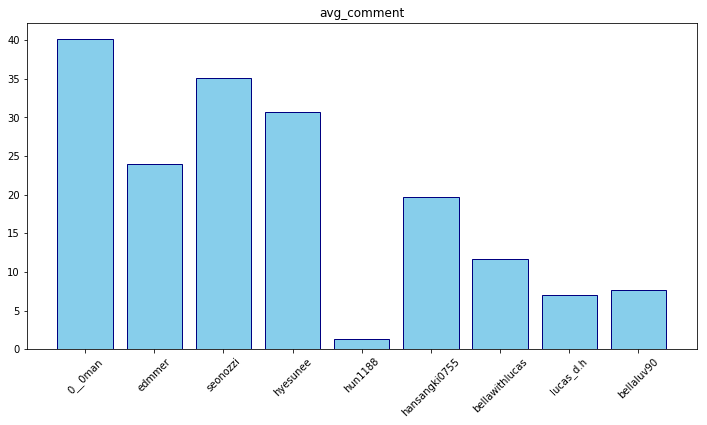

In [18]:
compare(sample, 'avg_comment')

In [32]:
def list_format(phrase):
    return phrase[1:-1].replace("'", "").replace(" ", "").split(',')

In [33]:
sample['Lang_Ratio'] = sample['lang_ratio'].apply(list_format)
sample

,Unnamed: 0,name,youtube,avg_hashtag,avg_comment,avg_self_comment,post_interval,ppl_img_ratio,comment_user_num,lang_ratio,Lang_Ratio
0,0,0__0man,0__0man,0.0,40.2,0.0,1.111111,0.86,"{'comment1': 219, 'comment2': 31, 'comment3': ...","{'ko': '55.47', 'emoji': '44.53'}","[ko:55.47, emoji:44.53]"
1,0,edmmer,EDMMER,0.6,24.0,3.2,1.428571,0.93,"{'comment1': 107, 'comment2': 24, 'comment3': ...","{'ko': '95.00', 'emoji': '5.00'}","[ko:95.00, emoji:5.00]"
2,0,seonozzi,JungSeonho,0.3,35.1,0.0,0.172414,0.15,"{'comment1': 225, 'comment2': 34, 'comment3': ...","{'ko': '87.44', 'emoji': '12.56'}","[ko:87.44, emoji:12.56]"
3,0,hyesunee,Mr19940711,0.9,30.7,0.0,0.588235,0.71,"{'comment1': 133, 'comment2': 28, 'comment3': ...","{'ko': '83.39', 'emoji': '16.61'}","[ko:83.39, emoji:16.61]"
4,0,hun1188,UC-6FxcmnbyVeZaYc025I_xQ,1.4,1.3,10.6,0.128205,0.67,"{'comment1': 4, 'comment2': 2, 'comment3': 0, ...","{'ko': '84.62', 'emoji': '15.38'}","[ko:84.62, emoji:15.38]"
5,0,hansangki0755,UC-IBt8pM8hWx8wiwjcDLdIQ,3.5,19.7,170.7,0.526316,0.07,"{'comment1': 78, 'comment2': 23, 'comment3': 3...",{'ko': '100.00'},[ko:100.00]
6,0,bellawithlucas,UC-Ju7Rpx4V9XsrLh2DXh9tw_1,1.6,11.7,11.2,0.256410,0.85,"{'comment1': 46, 'comment2': 16, 'comment3': 1...","{'ko': '73.50', 'emoji': '26.50'}","[ko:73.50, emoji:26.50]"
7,0,lucas_d.h,UC-Ju7Rpx4V9XsrLh2DXh9tw_2,2.4,7.0,242.2,0.188679,0.79,"{'comment1': 49, 'comment2': 18, 'comment3': 4...","{'ko': '93.33', 'emoji': '6.67'}","[ko:93.33, emoji:6.67]"
8,0,bellaluv90,UC-Ju7Rpx4V9XsrLh2DXh9tw_3,2.3,7.7,16.7,0.192308,0.95,"{'comment1': 33, 'comment2': 12, 'comment3': 2...","{'ko': '81.82', 'emoji': '18.18'}","[ko:81.82, emoji:18.18]"


In [20]:
pf_i = pf.drop(columns=['Unnamed: 0'])
pf_i.shape

(253, 9)

In [21]:
pf_i.head()

,alias,username,bio,num_of_posts,followers,following,bio_url,isprivate,scraped
0,조효진 & 갱상도 화장쟁이,hyojinc_,❤️문의 : chohyojin94517@naver.com\r\r\r\nLet's b...,1684,252174,616,m.hyolic.com,False,2019-07-13 07:10:48
1,순이,h_ue_,NaN,141,160047,107,www.youtube.com/channel/UC24ZdEFJvYvQwqnWJodWzng,False,2019-07-13 07:10:49
2,김근명,guikkm,#소근커플,534,203816,159,youtube.com/c/SKCouple,False,2019-07-13 07:10:51
3,sky in☁️,haneulin,NaN,174,332,1456,NaN,False,2019-07-13 07:10:53
4,선여정,seon_y_j,NaN,1103,382058,294,NaN,False,2019-07-13 07:10:55


In [34]:
pf.head(3)

,Unnamed: 0,alias,username,bio,num_of_posts,followers,following,bio_url,isprivate,scraped
0,0,조효진 & 갱상도 화장쟁이,hyojinc_,❤️문의 : chohyojin94517@naver.com\r\r\r\nLet's b...,1684,252174,616,m.hyolic.com,False,2019-07-13 07:10:48
1,1,순이,h_ue_,NaN,141,160047,107,www.youtube.com/channel/UC24ZdEFJvYvQwqnWJodWzng,False,2019-07-13 07:10:49
2,2,김근명,guikkm,#소근커플,534,203816,159,youtube.com/c/SKCouple,False,2019-07-13 07:10:51


(0, 2500)

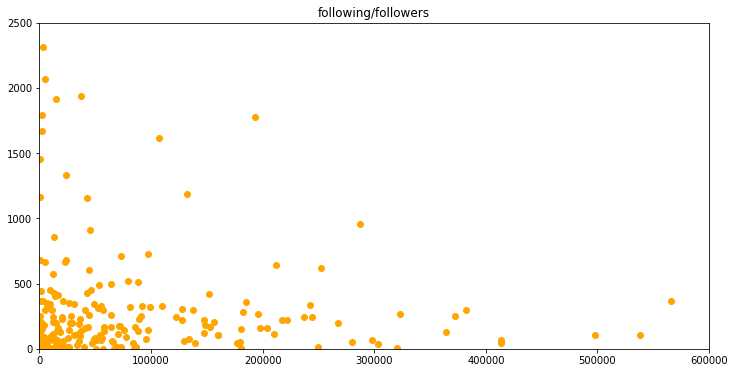

In [40]:
plt.figure(figsize=(12,6))
plt.scatter(pf['followers'], pf['following'], color='orange')
plt.title("following/followers")
plt.xlim(0, 600000)
plt.ylim(0, 2500)